## CIBO tutorial


In this tuturial we will show how to prepare your own datasets containing a list of procured reactions and inventory prices to perform a cost-informed Bayesian optimization.

First, we will inspect the processed direct arylation dataset.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from datasets import directaryl
import torch
import copy as cp
from BO import update_model


reaction_data = directaryl()

/Users/jan/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


As you can see the dataset contains quite a lot of information. In particular the ligand price in [$/gram] in the `Ligand_Cost_fixed` column.

In [2]:
reaction_data.data

,Ligand_inchi,Base_inchi,Solvent_inchi,Product_inchi,Electrophile_inchi,Nucleophile_inchi,Precatalyst_inchi,Base,Electrophile,Electrophile_PCI_Name,...,Electrophile_mg,Precatalyst_mg,Ligand_mg,Base_mg,Total_mg,PMI,Ligand_Cost_fixed,Base_SMILES,Ligand_SMILES,Solvent_SMILES
0,"InChI=1S/C14H23P/c1-13(2,3)15(14(4,5)6)12-10-8...","InChI=1S/C5H10O2.K/c1-5(2,3)4(6)7;/h1-3H3,(H,6...","InChI=1S/C6H12O2/c1-3-4-5-8-6(2)7/h3-5H2,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.166733,6.30990,144.438587,inf,102.0,CC(C)(C)C(=O)[O-].[K+],CC(C)(C)P(c1ccccc1)C(C)(C)C,CCCCOC(C)=O
1,InChI=1S/C13H13P/c1-14(12-8-4-2-5-9-12)13-10-6...,"InChI=1S/C5H10O2.K/c1-5(2,3)4(6)7;/h1-3H3,(H,6...","InChI=1S/C4H7N/c1-2-3-4-5/h2-3H2,1H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.150165,6.30990,131.522019,inf,8.0,CC(C)(C)C(=O)[O-].[K+],CP(c1ccccc1)c1ccccc1,CCCC#N
2,InChI=1S/C33H49P/c1-23(2)26-21-30(24(3)4)33(31...,"InChI=1S/C5H10O2.Cs/c1-5(2,3)4(6)7;/h1-3H3,(H,...","InChI=1S/C8H10/c1-7-3-5-8(2)6-4-7/h3-6H,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",CsOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.357540,10.53135,102.500967,76.699491,24.0,CC(C)(C)C(=O)[O-].[Cs+],CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,Cc1ccc(C)cc1
3,InChI=1S/C13H13P/c1-14(12-8-4-2-5-9-12)13-10-6...,"InChI=1S/C2H4O2.K/c1-2(3)4;/h1H3,(H,3,4);/q;+1...",InChI=1S/C4H9NO/c1-4(6)5(2)3/h1-3H3,InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOAc,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.150165,4.41630,257.540760,594.242438,8.0,CC(=O)[O-].[K+],CP(c1ccccc1)c1ccccc1,CC(=O)N(C)C
4,InChI=1S/C18H33P.BF4/c1-4-10-16(11-5-1)19(17-1...,"InChI=1S/C2H4O2.Cs/c1-2(3)4;/h1H3,(H,3,4);/q;+...","InChI=1S/C6H12O2/c1-3-4-5-8-6(2)7/h3-5H2,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",CsOAc,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.276180,8.63775,101.150394,inf,22.0,CC(=O)[O-].[Cs+],C1CCC([PH+](C2CCCCC2)C2CCCCC2)CC1.F[B-](F)(F)F,CCCCOC(C)=O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,InChI=1S/C18H15P/c1-4-10-16(11-5-1)19(17-12-6-...,"InChI=1S/C5H10O2.Cs/c1-5(2,3)4(6)7;/h1-3H3,(H,...","InChI=1S/C6H12O2/c1-3-4-5-8-6(2)7/h3-5H2,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",CsOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.196717,10.53135,248.339894,3501.472817,1.0,CC(C)(C)C(=O)[O-].[Cs+],c1ccc(P(c2ccccc2)c2ccccc2)cc1,CCCCOC(C)=O
1724,InChI=1S/C33H49P/c1-23(2)26-21-30(24(3)4)33(31...,"InChI=1S/C5H10O2.K/c1-5(2,3)4(6)7;/h1-3H3,(H,6...","InChI=1S/C4H7N/c1-2-3-4-5/h2-3H2,1H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.357540,6.30990,222.507231,239.134774,24.0,CC(C)(C)C(=O)[O-].[K+],CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,CCCC#N
1725,"InChI=1S/C8H11P/c1-9(2)8-6-4-3-5-7-8/h3-7H,1-2H3","InChI=1S/C5H10O2.K/c1-5(2,3)4(6)7;/h1-3H3,(H,6...","InChI=1S/C4H7N/c1-2-3-4-5/h2-3H

Next we will inspect the ligands in this dataset as well as the prices that were extracted from supplier websites;

There are 11 unique ligands in the dataset


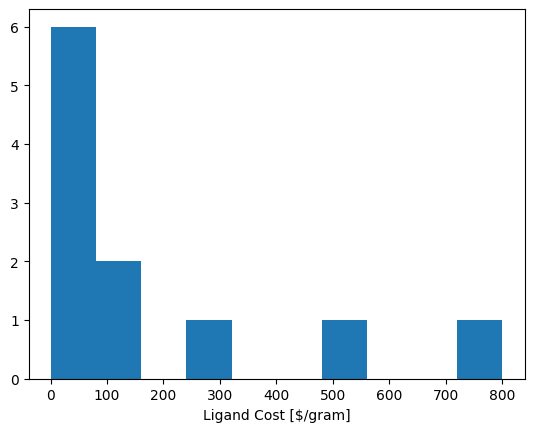

In [5]:
unique_ligands = np.unique(reaction_data.data["Ligand_Cost_fixed"].values)
unique_smiles = [
    reaction_data.data[reaction_data.data["Ligand_Cost_fixed"] == ligand][
        "Ligand_SMILES"
    ].values[0]
    for ligand in unique_ligands
]

print("There are", len(unique_ligands), "unique ligands in the dataset")

plt.hist(unique_ligands)
plt.xlabel("Ligand Cost [$/gram]")
plt.show()

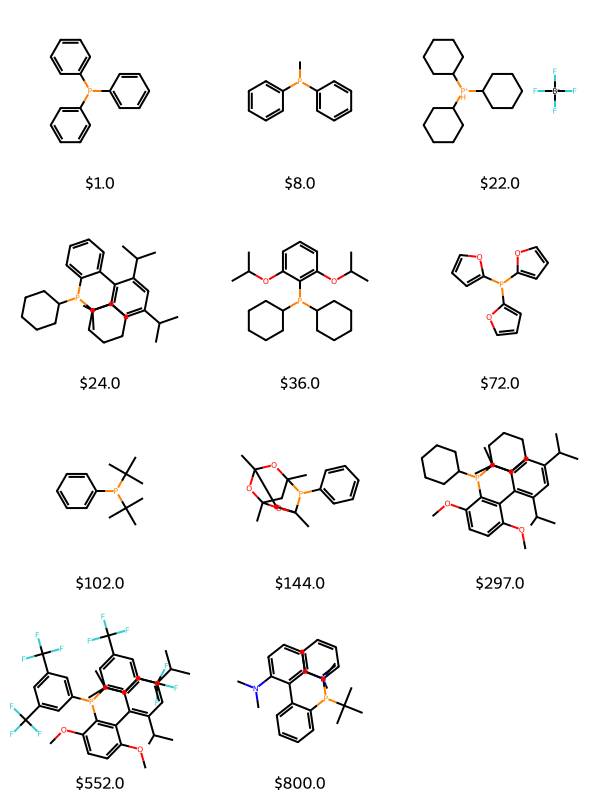

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor


# Generate molecules from SMILES and compute 2D coordinates
molecules = [Chem.MolFromSmiles(smiles) for smiles in unique_smiles]
for mol in molecules:
    rdDepictor.Compute2DCoords(mol)

# Create a dictionary of ligand prices and their corresponding molecules
ligand_dict = {f"${price}": mol for price, mol in zip(unique_ligands, molecules)}

# Draw the molecules with prices per gram as legends
img = Draw.MolsToGridImage(
    list(ligand_dict.values()), legends=list(ligand_dict.keys()), molsPerRow=3
)


img

Next we initialize the data with a random split between all measurements of the Direct Arylation dataset and featurize the datapoints via ECFP fingerprints and reaction conditions such as temperature and concentration. Finally, the feature vectors will be normalized to have a range of 0 to 1 in each dimension. 

In [60]:
from data.datasets import Evaluation_data

DATASET = Evaluation_data(
    "BMS",
    300,
    "random",
    init_strategy="random",
)

DATASET.get_init_holdout_data(111)

(
    X_init,
    y_init,
    costs_init,
    X_candidate,
    y_candidate,
    costs_candidate,
) = DATASET.get_init_holdout_data(111)

Results from the GPR model
train size =  300
test size =  1428
r2 =  0.7381926376148549
N =  300 MAE =  7.715682255751398


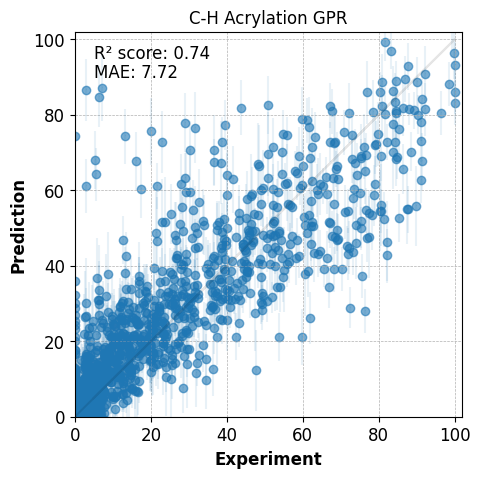

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error

model, scaler_y = update_model(X_init, y_init,fit_y=False, bounds_norm=DATASET.bounds_norm, FIT_METHOD=True)


y_pred = model.posterior(X_candidate).mean.detach().flatten().numpy()
y_std = np.sqrt(model.posterior(X_candidate).variance.detach().flatten().numpy())

y_pred = y_pred.flatten()
y_candidate = y_candidate.flatten()


r2 = r2_score(y_pred, y_candidate)
mae = mean_absolute_error(y_candidate, y_pred)

print("Results from the GPR model")
print("train size = ", len(X_init))
print("test size = ", len(X_candidate))
print("r2 = ", r2)
print("N = ", len(X_init), "MAE = ", mae)


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

dataset = "C-H Acrylation"


ax.set_title("{} GPR".format(dataset))
ax.errorbar(y_candidate, y_pred, yerr=y_std, marker=None, fmt=",", alpha=0.1)
ax.plot(y_candidate, y_candidate, color="black", alpha=0.1)
ax.scatter(y_candidate, y_pred, alpha=0.6)
# Setting the axis limits
ax.set_xlim(0, 102)
ax.set_ylim(0, 102)
ax.text(
    5, 95, f"R² score: {r2:.2f}", fontsize=12
)  # Adjust position and fontsize as needed
ax.text(5, 90, f"MAE: {mae:.2f}", fontsize=12)  # Adjust position and fontsize as needed
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xlabel("Experiment", fontsize=12, fontweight="bold")
ax.set_ylabel("Prediction", fontsize=12, fontweight="bold")
plt.savefig(f"correlation_{dataset}_GPR.pdf")

However, in real experimental settings often only a few data points for a handful of ligands are availible. In the extremecase only a single ligand was investigated. Therefore we use a different initialization scheme in which only a single ligand was tested, here corresponding to the one with the worst yield across all reaction conditions corresponding to the `worst_ligand` flag.

In [55]:
DATASET = Evaluation_data(
    "BMS",
    200,
    "update_ligand_when_used",
    init_strategy="worst_ligand",
)


(
    X_init,
    y_init,
    costs_init,
    X_candidate,
    y_candidate,
    costs_candidate,
    LIGANDS_init,
    LIGANDS_candidate,
    price_dict,
    exp_init,
    exp_candidate,
) = DATASET.get_init_holdout_data(111)

###############################################
Entries of X are not between 0 and 1. Adding MinMaxScaler to the pipeline.
###############################################


`X_init` are the representation vectors of the initial experiments and `y_init` are the corresponding yield measurements. 


`costs_init` contains an array of all the costs for the ligands for the initially collected data

`X_candidate` and `y_candidate` are representation vectors and measurements of the holdoutset respectively

`price_dict` is a dictionary of the current prices. Note that the inital ligand was already set to zero price as it was acquired before.

`exp_init` and `exp_candidate` are the experimental conditions corresponding to their vector `X_init` and `X_candidate` respectively.

Next we will just show a simple example how to perform a Cost-informed Bayesion optimization with CIBO

In [8]:
conf = {
    "dataset": "BMS",
    "init_strategy": "worst_ligand",
    "cost_aware": True,
    "n_runs": 5,
    "n_iter": 15,
    "batch_size": 5,
    "ntrain": 200,
    "prices": "update_ligand_when_used",
    "surrogate": "GP",
    "acq_func": "NEI",
    "label": "BMS_COST_GP_NEI",
    "cost_mod": "minus",
}

In [9]:
from utils import (
    create_aligned_transposed_price_table,
    data_dict_BO_LIGAND,
    data_dict_RS_LIGAND,
)
from experiments import (
    BO_LIGAND,
    BO_COI_LIGAND,
    RS_LIGAND,
)

print("Starting experiment: ", conf)
y_better_BO_ALL, y_better_RANDOM_ALL = [], []
running_costs_BO_ALL, running_costs_RANDOM_ALL = [], []

DATASET = Evaluation_data(
    conf["dataset"],
    conf["ntrain"],
    conf["prices"],
    init_strategy=conf["init_strategy"],
)
bounds_norm = DATASET.bounds_norm
N_RUNS = conf["n_runs"]
NITER = conf["n_iter"]
BATCH_SIZE = conf["batch_size"]
SURROGATE = conf["surrogate"]
COST_AWARE_BO = conf["cost_aware"]

for run in range(N_RUNS):
    SEED = 111 + run
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)

    (
        X_init,
        y_init,
        costs_init,
        X_candidate,
        y_candidate,
        costs_candidate,
        LIGANDS_init,
        LIGANDS_candidate,
        price_dict,
        exp_init,
        exp_candidate,
    ) = DATASET.get_init_holdout_data(SEED)

    print(create_aligned_transposed_price_table(price_dict))
    X, y = cp.deepcopy(X_init), cp.deepcopy(y_init)
    y_best = float(torch.max(y))
    model, scaler_y = update_model(X, y, bounds_norm, surrogate=SURROGATE)
    X_candidate_FULL, y_candidate_FULL = cp.deepcopy(X_candidate), cp.deepcopy(
        y_candidate
    )
    X_candidate_BO = cp.deepcopy(X_candidate)
    y_candidate_BO = cp.deepcopy(y_candidate)
    exp_candidate_BO = cp.deepcopy(exp_candidate)


    y_candidate_RANDOM = cp.deepcopy(y_candidate).detach().numpy()
    exp_candidate_RANDOM = cp.deepcopy(exp_candidate)

    running_costs_BO = [0]
    running_costs_RANDOM = [0]

    price_dict_BO = cp.deepcopy(price_dict)
    price_dict_RANDOM = cp.deepcopy(price_dict)

    LIGANDS_candidate_BO = cp.deepcopy(LIGANDS_candidate)
    LIGANDS_candidate_RANDOM = cp.deepcopy(LIGANDS_candidate)

    y_better_BO = []
    y_better_RANDOM = []

    y_better_BO.append(y_best)
    y_better_RANDOM.append(y_best)
    y_best_BO, y_best_RANDOM = y_best, y_best

    BO_data = data_dict_BO_LIGAND(
        model,
        y_best_BO,
        scaler_y,
        X,
        y,
        X_candidate_BO,
        y_candidate_BO,
        LIGANDS_candidate_BO,
        y_better_BO,
        price_dict_BO,
        running_costs_BO,
        bounds_norm,
        BATCH_SIZE,
        None,
        SURROGATE,
        conf["acq_func"],
        exp_init,
        exp_candidate_BO,
    )

    BO_data["cost_mod"] = conf["cost_mod"]

    RANDOM_data = data_dict_RS_LIGAND(
        y_candidate_RANDOM,
        y_best_RANDOM,
        LIGANDS_candidate_RANDOM,
        price_dict_RANDOM,
        BATCH_SIZE,
        None,
        y_better_RANDOM,
        running_costs_RANDOM,
        exp_init,
        exp_candidate_RANDOM,
    )

    for i in range(NITER):
        if COST_AWARE_BO == False:
            BO_data = BO_LIGAND(BO_data)
        else:
            BO_data = BO_COI_LIGAND(BO_data)

        RANDOM_data = RS_LIGAND(RANDOM_data)

        print("--------------------")
        print(
            "# |{}/{}|\tBO {:.2f}\tRS {:.2f} \tSUM(COSTS BO): ${}\tSUM(COSTS RS): ${}\tN_train {}".format(
                i + 1,
                NITER,
                BO_data["y_best_BO"],
                RANDOM_data["y_best_RANDOM"],
                BO_data["running_costs_BO"][-1],
                RANDOM_data["running_costs_RANDOM"][-1],
                BO_data["N_train"],
            )
        )
        print(create_aligned_transposed_price_table(price_dict_BO))

    y_better_BO_ALL.append(BO_data["y_better_BO"])
    y_better_RANDOM_ALL.append(RANDOM_data["y_better_RANDOM"])
    running_costs_BO_ALL.append(BO_data["running_costs_BO"])
    running_costs_RANDOM_ALL.append(RANDOM_data["running_costs_RANDOM"])

y_better_BO_ALL = np.array(y_better_BO_ALL)
y_better_RANDOM_ALL = np.array(y_better_RANDOM_ALL)

Starting experiment:  {'dataset': 'BMS', 'init_strategy': 'worst_ligand', 'cost_aware': True, 'n_runs': 5, 'n_iter': 30, 'batch_size': 5, 'ntrain': 200, 'prices': 'update_ligand_when_used', 'surrogate': 'GP', 'acq_func': 'NEI', 'label': 'BMS_COST_GP_NEI', 'cost_mod': 'minus'}
###############################################
Entries of X are not between 0 and 1. Adding MinMaxScaler to the pipeline.
###############################################
Ligand 1  | Ligand 2  | Ligand 3  | Ligand 4  | Ligand 5  | Ligand 6  | Ligand 7  | Ligand 8  | Ligand 9  | Ligand 10 | Ligand 11 | Ligand 12
---------------------------------------------------------------------------------------------------------------------------------------------
22.0      | 102.0     | 36.0      | 24.0      | 144.0     | 800.0     | 297.0     | 552.0     | 0         | 8.0       | 1.0       | 72.0     
--------------------
# |1/30|	BO 89.71	RS 53.61 	SUM(COSTS BO): $9.0	SUM(COSTS RS): $427.0	N_train 149
Ligand 1  | Ligand 2  |

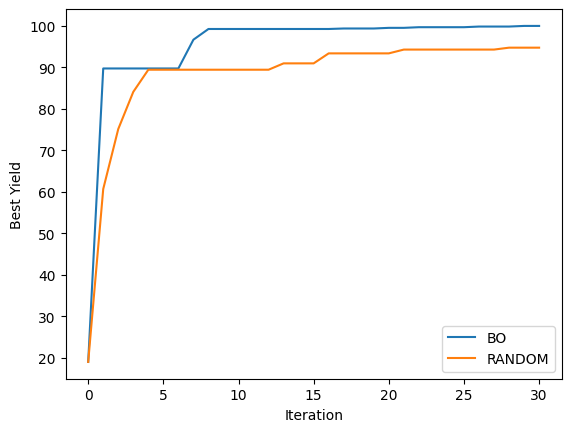

In [19]:
CIBO = np.mean(y_better_BO_ALL, axis=0)
RANDOM = np.mean(y_better_RANDOM_ALL, axis=0)


fig, ax = plt.subplots()
ax.plot(CIBO, label="CIBO")
ax.plot(RANDOM, label="RANDOM")

ax.set_xlabel("Iteration")
ax.set_ylabel("Best Yield")

plt.legend()
plt.show()